### Deep Learning Lab -- Forward Propagate A Dataset Built With Images

In this lab you'll forward propagate using a dataset that contains digits of handwritten digits.  

Your neural network will have the following qualities to it:

 - An input layer
 - two hidden layers, one with 5 neurons, and one with 10
 - an output layer that has 10 predicted classes of outcomes

#### Step 1:  Load in the MNIST Dataset

In [2]:
import pickle
with open('/Users/devonbancroft/Desktop/Devon-GA-DAT-10-14/Data/MNIST/processed/X_train.pkl', 'rb') as data:
    X_train = pickle.load(data)

#### Step 2:  Check the shape of your training images, and look at the first item.

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### Step 3).  Try using the imshow() method in matplotlib to see what the first image looks like

In [5]:
import matplotlib.pyplot as plt

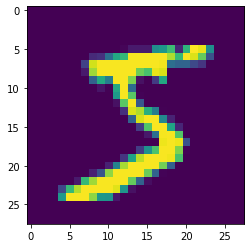

In [6]:
plt.imshow(X_train[0])

#### Try looking at a few more to see what they look like.  Also look at the training labels to see their corresponding identity.

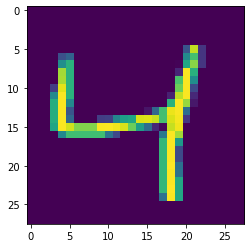

In [7]:
plt.imshow(X_train[2])

In [8]:
import pandas as pd

In [9]:
with open('/Users/devonbancroft/Desktop/Devon-GA-DAT-10-14/Data/MNIST/processed/y_train.pkl', 'rb') as data:
    y_train = pickle.load(data)

In [10]:
y_train[2]

4

**How many unique labels are there?**

In [11]:
pd.Series(y_train).nunique()

10

#### Step 4).  To make this a little bit easier, let's just use the first 100 images of the dataset, so computation doesn't take too long.

In [12]:
X_train = X_train[0:100]
y_train = y_train[0:100]

#### Standardize by dividing the training set by 255

In [13]:
X_train = X_train/255

**Any idea why we'd do this instead of traditional standardization?**

idk, 255 is maximum value. So its % of maximum value. Keeps numbers from 0 to 1?

#### Step 5).  Reshape your data so that it's two dimensional:  100X784

In [14]:
X_train = X_train.reshape(100, 784)

In [15]:
pd.DataFrame(X_train).shape

(100, 784)

In [16]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Step 6). Initialize a hidden unit with 10 neurons, as well as a separate set of variables that represent a coefficient for each column in your hidden layer.

In [17]:
import numpy as np

In [18]:
coeff     = np.random.normal(0, 0.1, size=7840).reshape(784, 10)
intercept = np.random.normal(0, 0.1, size = 10 )

In [74]:
coeff

array([[ 0.05690403,  0.28255046,  0.10902056, ...,  0.21115948,
         0.2280159 , -0.18044929],
       [-0.14288373,  0.08374561, -0.00350527, ..., -0.0587088 ,
         0.0406578 , -0.11489162],
       [ 0.1507543 , -0.08384082,  0.01746295, ...,  0.06993726,
        -0.04683141, -0.06977416],
       ...,
       [ 0.04583599,  0.12598089,  0.08072213, ..., -0.08236491,
        -0.01467741,  0.16442224],
       [-0.16477861, -0.16500921,  0.05649829, ..., -0.03766518,
        -0.12351664,  0.08416435],
       [-0.18690005, -0.10098083, -0.01836575, ...,  0.00138556,
         0.03037878, -0.02050662]])

#### Step 7).  Use the dot() method to matrix multiply your input with your layer of hidden weights to create your hidden layer.  Apply the Relu activation function afterwards.

In [19]:
X_hidden = X_train.dot(coeff)+intercept

In [20]:
X_hidden.shape

(100, 10)

In [21]:
X_hidden = np.maximum(0, X_hidden)

In [22]:
X_hidden.shape

(100, 10)

**check:** The shape of your output should be 100 x 10.

#### Step 8:  Initialize another hidden layer with 5 neurons, with the appropriate number of intercept terms.

In [23]:
coeff2     = np.random.normal(0, 0.1, size=50).reshape(10, 5)
intercept2 = np.random.normal(0, 0.1, size = 5)

In [24]:
X_hidden2 = X_hidden.dot(coeff2)+intercept2

#### Step 9:  Matrix multiply the output from your last layer, and activate it with ReLu.

In [25]:
X_hidden2 = X_hidden.dot(coeff2)+intercept2
X_hidden2 = np.maximum(0, X_hidden2)

#### Step 10:  Create Your Output Layer To Accommodate Each Unique Value in y.  No intercept terms.

In [26]:
coeff3     = np.random.normal(0, 0.1, size=50).reshape(5, 10)

In [27]:
output = X_hidden2.dot(coeff3)

#### Step 11:  Matrix multiply your last hidden layer with your output layer, and apply the sigmoid function

In [28]:
output = X_hidden2.dot(coeff3)

In [31]:
import numpy as np

In [33]:
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [35]:
sigmoid(output).shape

(100, 10)

In [36]:
predictions = sigmoid(output)

#### Step 12:  Create your prediction by choosing the column in your output layer with the highest overall value.

In [41]:
predictions = pd.DataFrame(sigmoid(output)).idxmax(axis=1)

In [63]:
pd.DataFrame(predictions).head()

,0
0,0
1,8
2,8
3,8
4,2


#### What Was The Accuracy After Your First Round of Computation?

In [48]:
answers = pd.DataFrame(y_train)

In [49]:
answers['predictions'] = pd.DataFrame(predictions)

In [52]:
answers.rename({0:'answer'}, axis=1, inplace=True)

In [70]:
print("Accuracy =", round(np.mean(answers.answer == answers.predictions) * 100, 2), '%')

Accuracy = 4.0 %


4% accuracy

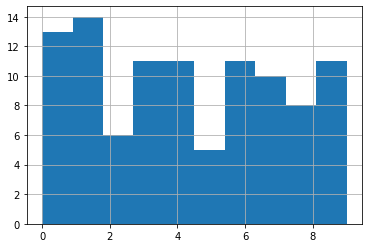

In [55]:
answers.answer.hist()

In [60]:
answers.answer.value_counts()

1    14
0    13
9    11
6    11
4    11
3    11
7    10
8     8
2     6
5     5
Name: answer, dtype: int64

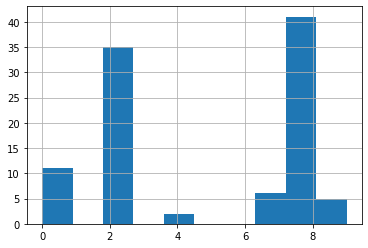

In [58]:
answers.predictions.hist()

In [62]:
answers.predictions.value_counts()

8    41
2    35
0    11
7     6
9     5
4     2
Name: predictions, dtype: int64

In [73]:
np.mean(answers.predictions.isin([8, 2]))

0.76

#### Bonus:  Create Your Own Functions Called `forward` and `predict` that codify what you did in this lab, where you can specify how many neurons to use for each hidden layer, and make a corresponding prediction.

In [75]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.sigmoid)
])

ModuleNotFoundError: No module named 'tensorflow'

In [76]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NameError: name 'model' is not defined